In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('healthcare-dataset.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.apply(lambda x: print(x.value_counts()))

9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
0    4612
1     498
Name: hypertension, dtype: int64
0    4834
1     276
Name: heart_disease, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64
28.7    41
28.4    38
26.7    37
27.6  

id                   None
gender               None
age                  None
hypertension         None
heart_disease        None
ever_married         None
work_type            None
Residence_type       None
avg_glucose_level    None
bmi                  None
smoking_status       None
stroke               None
dtype: object

In [7]:
df.apply(lambda x: len(x.unique()))

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [8]:
# Data Preproccessing
# drop id col
df.drop(columns=['id'], inplace=True)

In [9]:
# Showing records where patient suffered from stroke but had missing value in bmi attribute.
df[df['bmi'].isna() & df['stroke'] == 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,Male,59.00,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,Female,63.00,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,Female,76.00,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,Male,78.00,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


In [10]:
# Replace the missing values with mean of bmi attribute
df['bmi'].fillna(value=df['bmi'].mean(), inplace = True)

In [11]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df = df[df['gender'] != 'Other']

In [13]:
# EDA

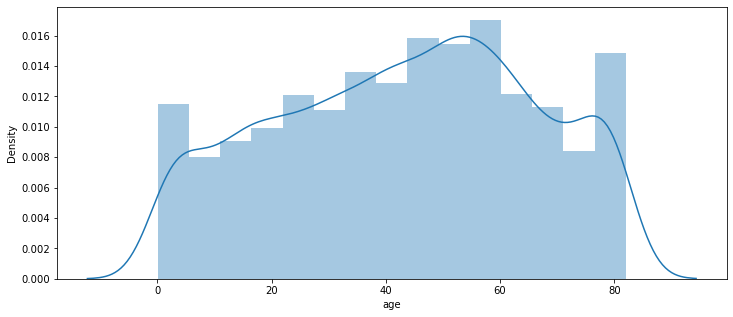

In [14]:
# AGE variation

plt.figure(figsize=(12,5))
sns.distplot(df['age'], bins=15);

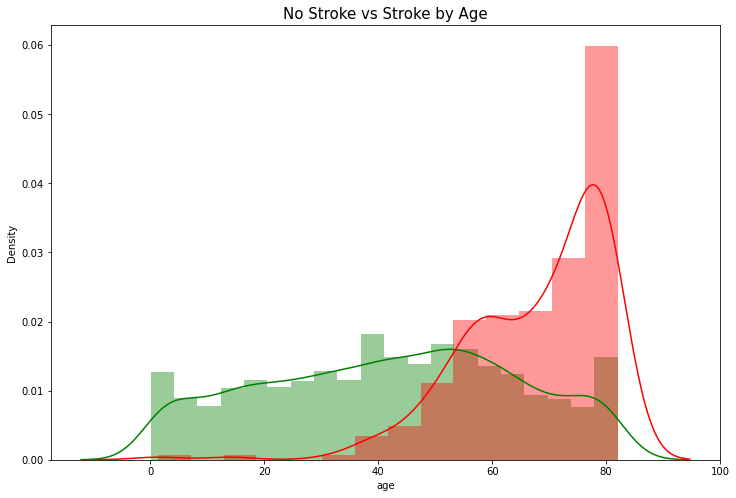

In [15]:
plt.figure(figsize=(12,8))

sns.distplot(df[df['stroke'] == 0]["age"], color='green')
sns.distplot(df[df['stroke'] == 1]["age"], color='red')

plt.title('No Stroke vs Stroke by Age', fontsize=15)

plt.show()

In [16]:
# it's very obious that people get strokes in elder ages

# the age column is a little left skewed with a peak around 60s

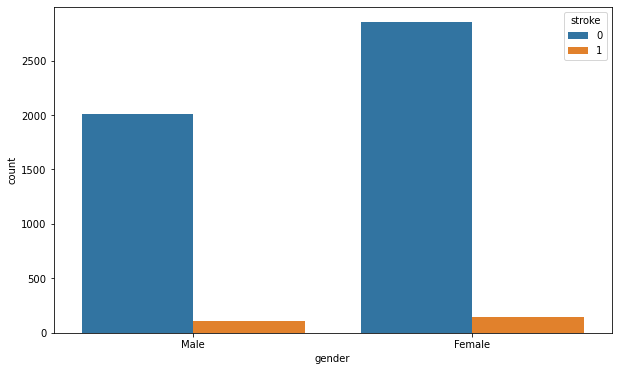

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender', data=df, hue='stroke');

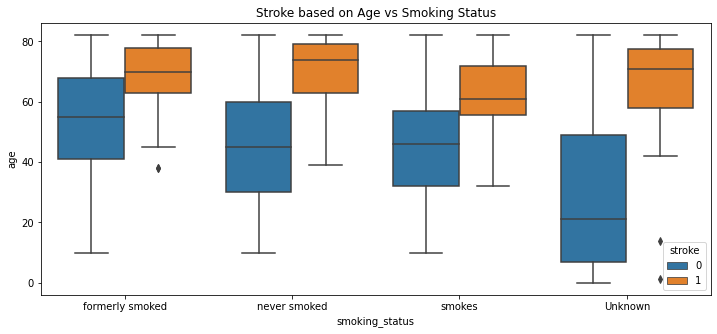

In [18]:
plt.figure(figsize=(12,5))
sns.boxplot(y='age', x='smoking_status',hue='stroke' ,data=df)
plt.title('Stroke based on Age vs Smoking Status')
plt.show()


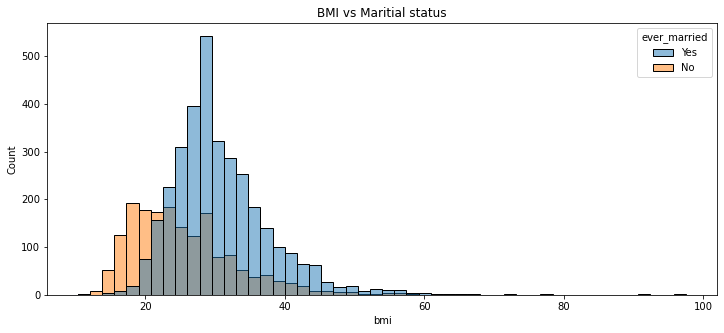

In [19]:
plt.figure(figsize=(12,5))
sns.histplot(x='bmi', hue='ever_married', data=df, bins=50)
plt.title('BMI vs Maritial status')
plt.show()
# Married people have higher BMI

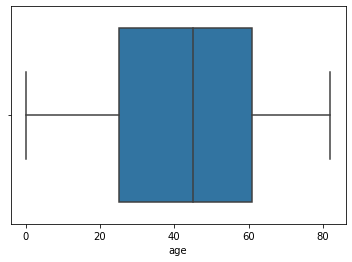

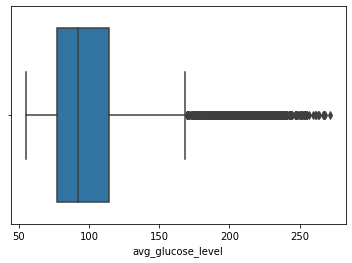

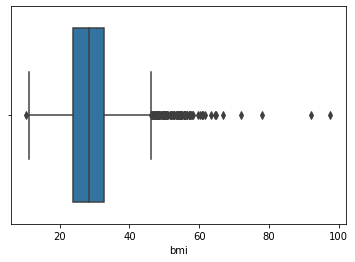

In [20]:
# outliers
for i in df[['age','avg_glucose_level','bmi']] :
    sns.boxplot(df[i])
    plt.show()

In [21]:
cols = ['avg_glucose_level','bmi'] 

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

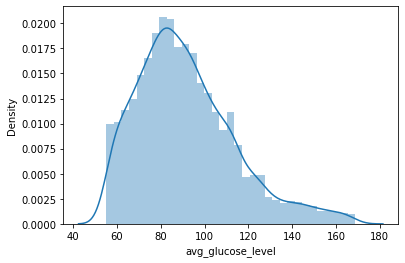

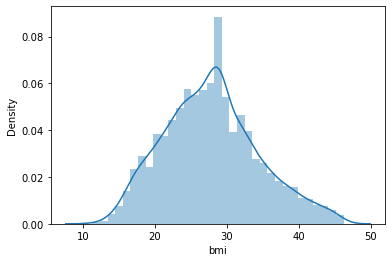

In [22]:
# Skewness

for i in df[['avg_glucose_level','bmi']] :
    sns.distplot(df[i])
    plt.show()

In [23]:
# Machine Learning

In [24]:
X = df.iloc[:,0:-1]
y = df.iloc[:, -1]
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
X['gender'] = le.fit_transform(X['gender']) # gender column
X['ever_married'] = le.fit_transform(X['ever_married']) # ever_married column
X['Residence_type'] = le.fit_transform(X['Residence_type']) # Residence_type column

In [27]:
X= pd.get_dummies(X, columns = ['smoking_status', 'work_type'])
X.shape

(4390, 17)

In [28]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
2,1,80.0,0,1,1,0,105.92,32.500000,0,0,1,0,0,0,1,0,0
6,1,74.0,1,1,1,0,70.09,27.400000,0,0,1,0,0,0,1,0,0
7,0,69.0,0,0,0,1,94.39,22.800000,0,0,1,0,0,0,1,0,0
8,0,59.0,0,0,1,0,76.15,28.893237,1,0,0,0,0,0,1,0,0
9,0,78.0,0,0,1,1,58.57,24.200000,1,0,0,0,0,0,1,0,0


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3512, 17), (3512,), (878, 17), (878,))

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [32]:
# Balancing the data

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train.ravel())

In [35]:
print (X_train.shape)
print (y_train.shape)
print (sum(y_train == 1))
print (sum(y_train == 0))


(6766, 17)
(6766,)
3383
3383


In [36]:
# Model selectiton

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [38]:
print("model score=",model.score(X_test,y_test))

model score= 0.7562642369020501


In [39]:
from sklearn.metrics import accuracy_score

In [40]:
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.7562642369020501


In [41]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

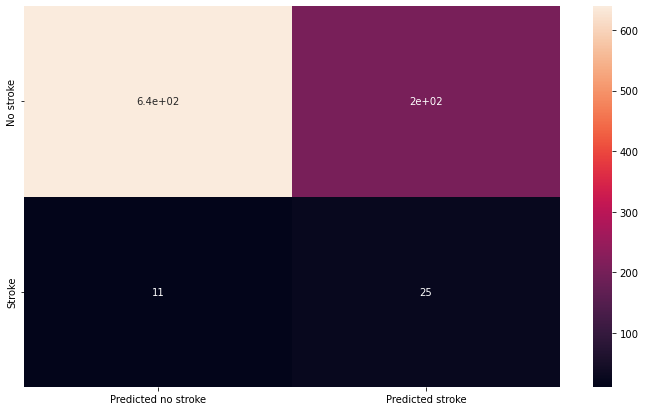

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True, yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.show()

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       842
           1       0.11      0.69      0.19        36

    accuracy                           0.76       878
   macro avg       0.55      0.73      0.52       878
weighted avg       0.95      0.76      0.83       878



In [44]:
score = roc_auc_score(y_test, y_pred)
score

0.726675903932436

In [45]:
fpr,tpr,thresholds = roc_curve(y_test, y_pred)

In [46]:
thresholds

array([2, 1, 0], dtype=int64)

In [47]:
fpr

array([0.        , 0.24109264, 1.        ])

In [48]:
tpr

array([0.        , 0.69444444, 1.        ])

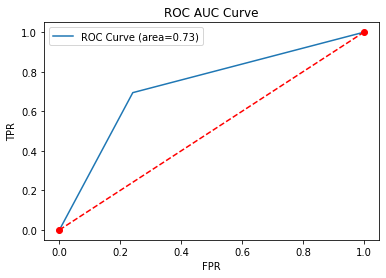

In [49]:
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score)
plt.plot([0,1], [0,1], 'ro--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [84]:
print("model score=",knn.score(X_test,y_test))

model score= 0.8656036446469249


In [52]:
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.7562642369020501


In [53]:
cm = confusion_matrix(y_test, y_pred)

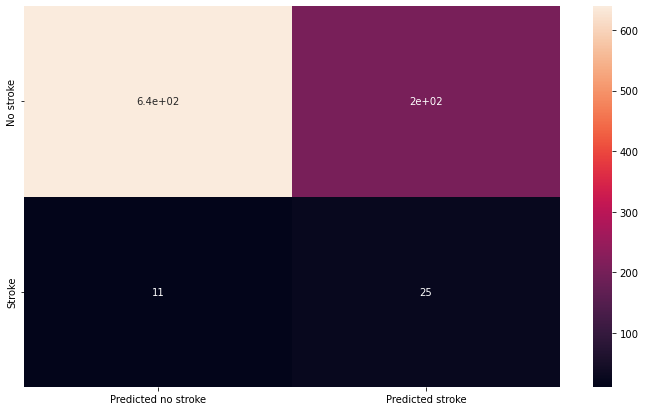

In [54]:
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True, yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.show()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       842
           1       0.11      0.69      0.19        36

    accuracy                           0.76       878
   macro avg       0.55      0.73      0.52       878
weighted avg       0.95      0.76      0.83       878



In [56]:
accuracy_rate = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, y,cv=10)
    accuracy_rate.append(score.mean())

In [57]:
score

array([0.96127563, 0.95899772, 0.96127563, 0.96127563, 0.96127563,
       0.96355353, 0.96355353, 0.95899772, 0.95899772, 0.96127563])

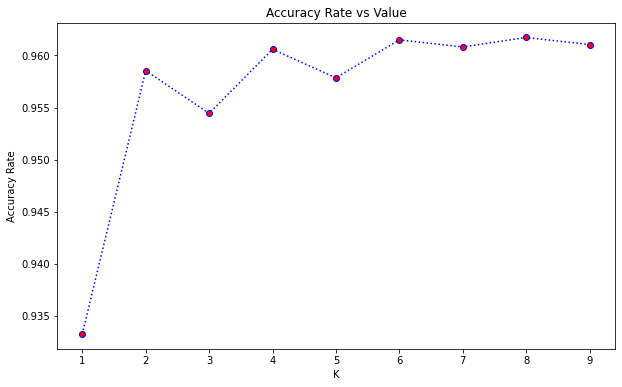

In [58]:
plt.figure(figsize=(10,6))

plt.plot(range(1,10), accuracy_rate, color='blue', linestyle='dotted', marker='o', markerfacecolor='red')

plt.title('Accuracy Rate vs Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

In [59]:
error_rate = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

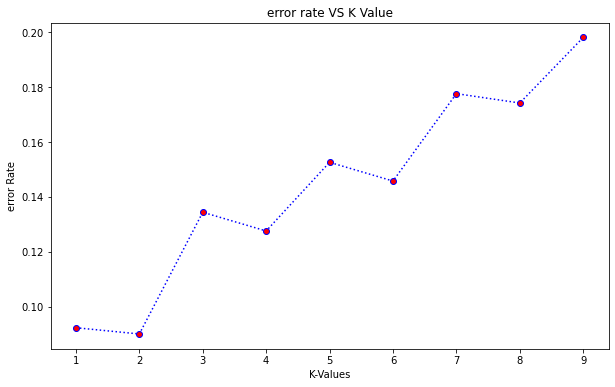

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dotted', marker='o', markerfacecolor='red')
plt.title('error rate VS K Value')
plt.xlabel('K-Values')
plt.ylabel('error Rate')
plt.show()

In [61]:
from sklearn.ensemble import RandomForestClassifier
model =  RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [62]:
print("model score=",model.score(X_test,y_test))

model score= 0.6275626423690205


In [63]:
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.6275626423690205


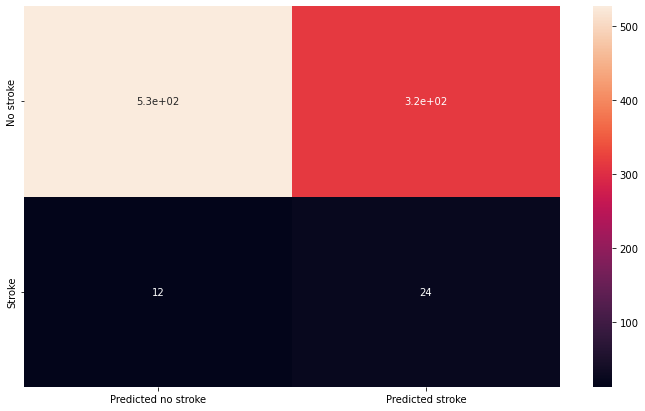

In [64]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True, yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.show()

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.63      0.76       842
           1       0.07      0.67      0.13        36

    accuracy                           0.63       878
   macro avg       0.52      0.65      0.45       878
weighted avg       0.94      0.63      0.74       878



In [66]:
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [67]:
print("model score=",model.score(X_test,y_test))

model score= 0.591116173120729


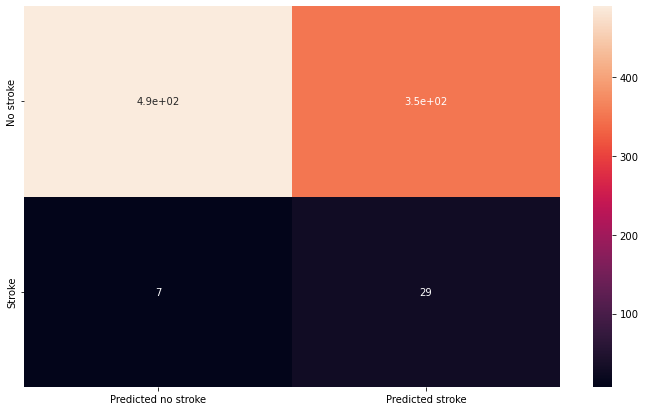

In [68]:
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True, yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.show()

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.58      0.73       842
           1       0.08      0.81      0.14        36

    accuracy                           0.59       878
   macro avg       0.53      0.69      0.44       878
weighted avg       0.95      0.59      0.71       878



In [70]:
# Hyperparameters Tuning
from sklearn.model_selection import GridSearchCV

In [71]:
# logistic regression
params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.025,0.05]}
grid_log_reg = GridSearchCV(LogisticRegression(), params, scoring = 'accuracy',cv = 6)
grid_log_reg.fit(X_train, y_train)
best_score = grid_log_reg.best_score_
best_params = grid_log_reg.best_params_
print ('Best Score is',best_score * 100)
print ('Best Parameters is', best_params)

Best Score is 79.4411196485995
Best Parameters is {'C': 0.05, 'penalty': 'l2'}


In [72]:
# KNN
kn_params = {'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan'
                                                 ]}
kn = GridSearchCV(KNeighborsClassifier(), kn_params, scoring = 'accuracy',cv = 6)
kn.fit(X_train, y_train)
best_score = kn.best_score_
best_params = kn.best_params_
print ('Best Score is',best_score * 100)
print ('Best Parameters is', best_params)

Best Score is 93.77762359954774
Best Parameters is {'metric': 'manhattan', 'n_neighbors': 5}


In [73]:
# Ramdom Forest
rf_params = {'n_estimators':[100,150,200],'criterion':['gini','entropy'],}
rf = GridSearchCV(RandomForestClassifier(), rf_params, scoring = 'accuracy',cv = 6)
rf.fit(X_train, y_train)
best_score = rf.best_score_
best_params = rf.best_params_
print ('Best Score is',best_score * 100)
print ('Best Parameters is', best_params)

Best Score is 97.25101264681018
Best Parameters is {'criterion': 'gini', 'n_estimators': 200}


In [74]:
# apply the highest accuracy model with best hyperparameters

In [80]:
model =  RandomForestClassifier(n_estimators=200, criterion='gini')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [81]:
print("model score=",model.score(X_test,y_test))

model score= 0.6697038724373576


In [82]:
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.6697038724373576


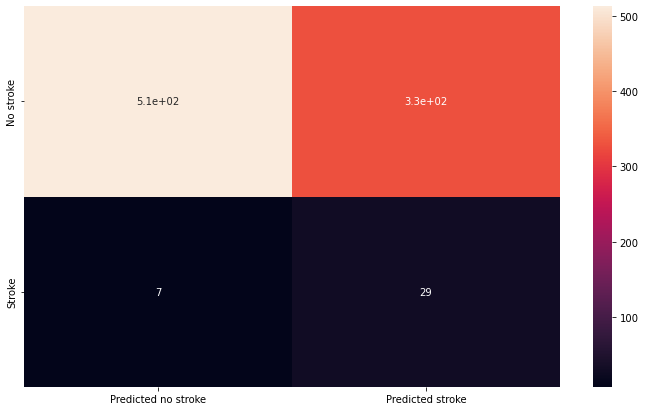

In [78]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True, yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.show()

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.61      0.75       842
           1       0.08      0.81      0.15        36

    accuracy                           0.62       878
   macro avg       0.53      0.71      0.45       878
weighted avg       0.95      0.62      0.73       878

